In [1]:
import sys
import torch

print("Python:", sys.version)
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name())
else:
    print("⚠ No GPU detected by PyTorch")

# Install YOLOv8 (Ultralytics)
# !pip install ultralytics -q

from ultralytics import YOLO
print("Ultralytics imported successfully.")

Python: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
Torch: 2.5.1+cu121
CUDA available: True
GPU: NVIDIA GeForce RTX 3050 Laptop GPU
Ultralytics imported successfully.


In [2]:
BASE_PATH = r"C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA"

DATASET_PATH = BASE_PATH + r"\yolo_dataset"  # folder you created earlier
YAML_PATH = DATASET_PATH + r"\dataset.yaml"

print("BASE_PATH:", BASE_PATH)
print("DATASET_PATH:", DATASET_PATH)
print("YAML_PATH:", YAML_PATH)

BASE_PATH: C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA
DATASET_PATH: C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset
YAML_PATH: C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\dataset.yaml


In [3]:
import os

def check_tree(root):
    for path, dirs, files in os.walk(root):
        print(path)
        for f in files[:5]:
            print("  -", f)
        print("---")

check_tree(DATASET_PATH)

C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset
  - dataset.yaml
---
C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\images
---
C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\images\train
  - 0000f77c-6257be58.jpg
  - 0000f77c-62c2a288.jpg
  - 0000f77c-cb820c98.jpg
  - 0001542f-ec815219.jpg
  - 0004974f-05e1c285.jpg
---
C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\images\val
  - 0001542f-5ce3cf52.jpg
  - 0001542f-7c670be8.jpg
  - 00067cfb-f1b91e3c.jpg
  - 000e0252-8523a4a9.jpg
  - 00131ea7-624f538d.jpg
---
C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\labels
  - train.cache
  - val.cache
---
C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\labels\train
  - 0000f77c-6257be58.txt
  - 0000f77c-62c2a288.txt
  - 0000f77c-cb820c98.txt
  - 0001542f-ec815219.txt
  - 0004974f-05e1c285.txt
---
C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\labels\val
  - 0001542f-5c

In [4]:
model = YOLO("yolov8s.pt")  # pretrained weights
print("Model loaded.")

Model loaded.


c:\Users\niran\OneDrive\Desktop\Bosch\Assignment\.bosch-eda\lib\site-packages\ultralytics\nn\tasks.py:634: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(fi

In [22]:
results = model.train(
    data=YAML_PATH,
    epochs=1,
    imgsz=640,
    batch=8,            # your RTX 3050 can handle this
    device=0,           # force GPU
    workers=2,          # Windows limitation
    project=BASE_PATH + r"\model_outputs",
    name="yolo8_bdd100k",
    exist_ok=True
)

New https://pypi.org/project/ultralytics/8.3.228 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.0 🚀 Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\dataset.yaml, epochs=1, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\model_outputs, name=yolo8_bdd100k, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1,

train: Scanning C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\labels\train.cache... 62876 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62876/62876 [00:00<?, ?it/s]

train: WARNING ⚠️ C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\images\train\75055858-7d04a650.jpg: 1 duplicate labels removed



val: Scanning C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\labels\val.cache... 6987 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6987/6987 [00:00<?, ?it/s]


Plotting labels to C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\model_outputs\yolo8_bdd100k\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1       4.6G      1.379      1.006      1.019        130        640: 100%|██████████| 7860/7860 [1:31:55<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 437/437 [02:47<00:00,  2.62it/s]


                   all       6987     129063      0.502      0.355      0.373        0.2

1 epochs completed in 1.580 hours.
Optimizer stripped from C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\model_outputs\yolo8_bdd100k\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\model_outputs\yolo8_bdd100k\weights\best.pt, 22.5MB

Validating C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\model_outputs\yolo8_bdd100k\weights\best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 437/437 [01:26<00:00,  5.05it/s]


                   all       6987     129063      0.503      0.355      0.373        0.2
                  bike       6987        702      0.496      0.311      0.315      0.146
                   bus       6987       1174      0.539       0.39        0.4      0.294
                   car       6987      71884      0.634      0.675       0.69      0.419
                 motor       6987        307      0.496      0.176      0.215     0.0926
                person       6987       8977      0.585      0.468      0.495      0.233
                 rider       6987        431      0.601      0.223      0.285      0.132
         traffic light       6987      18450      0.534      0.435      0.412       0.14
          traffic sign       6987      24012      0.602      0.449      0.473      0.237
                 train       6987          9          0          0          0          0
                 truck       6987       3117      0.542      0.425       0.45      0.303
Speed: 0.2ms preproce

In [5]:
metrics = model.val(
    data=YAML_PATH,
    imgsz=640,
    batch=8,
    device=0
)

metrics

Ultralytics YOLOv8.1.0 🚀 Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)


YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs


val: Scanning C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\labels\val.cache... 6987 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6987/6987 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 874/874 [01:28<00:00,  9.83it/s]


                   all       6987     129063      0.116     0.0794     0.0798     0.0455
                person       6987        702    0.00893     0.0684    0.00278   0.000652
               bicycle       6987       1174          0          0   3.56e-05   3.21e-05
                   car       6987      71884      0.745      0.484      0.577      0.346
            motorcycle       6987        307        0.4      0.241      0.215      0.106
              airplane       6987       8977          0          0          0          0
                   bus       6987        431          0          0    0.00012   4.11e-05
                 train       6987      18450          0          0          0          0
                 truck       6987      24012    0.00122   0.000208    0.00259    0.00127
                  boat       6987          9          0          0          0          0
         traffic light       6987       3117          0          0   0.000203   0.000102
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021415862020>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,   

Sample: C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\images\val\66ff6d6a-f3319557.jpg

image 1/1 C:\Users\niran\OneDrive\Desktop\Bosch\Assignment\EDA\yolo_dataset\images\val\66ff6d6a-f3319557.jpg: 384x640 6 persons, 11 cars, 1 traffic light, 249.4ms
Speed: 5.3ms preprocess, 249.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to c:\Users\niran\OneDrive\Desktop\Bosch\Assignment\runs\detect\predict


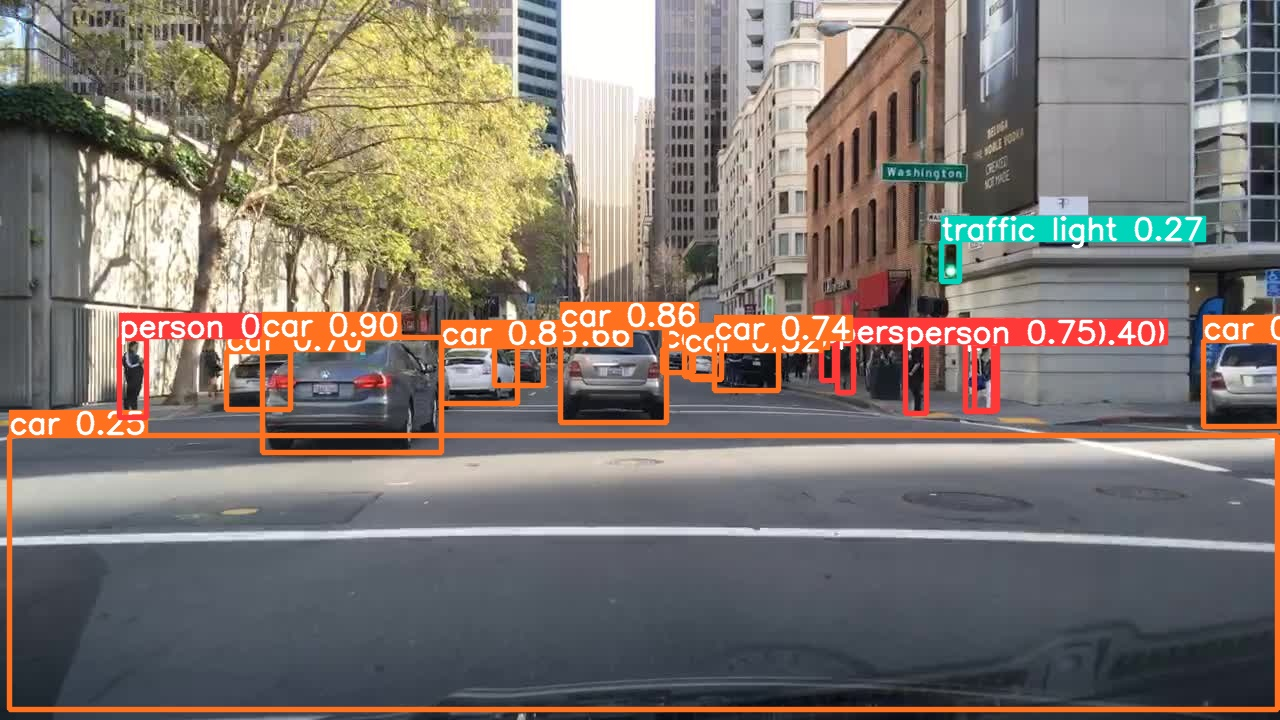

In [23]:
import random
from IPython.display import Image, display

val_dir = DATASET_PATH + r"\images\val"
sample_image = random.choice(os.listdir(val_dir))
sample_path = val_dir + "\\" + sample_image

print("Sample:", sample_path)

pred = model.predict(sample_path, save=True, imgsz=640)
display(Image(filename=pred[0].save_dir + "/" + sample_image))